Case Studies

Project: 1

Group: 3

Group Members:
 - Muhammad Raafey Tariq (231806)
 - Farrukh Ahmed (230614)
 - Amirreza Khamehchin Khiabani (230891)


Requirements:
 - numpy==1.24.2
 - matplotlib==3.7.1
 - seaborn==0.12.2
 - pandas==2.0.0
 - openpyxl==3.1.2

Installation Commands (One-time only)
 - pip install pandas==2.0.0
 - pip install numpy==1.24.2
 - pip install seaborn==0.12.2
 - pip install matplotlib==3.7.1
 - pip install openpyxl==3.1.2

Imports and Libraries

In [2]:
import pandas as pd
import numpy as np
import itertools
import pprint

# used for the graphs
import seaborn as sns
import os
sns.set(font_scale = 1.2)

# used for plotting
from matplotlib import pyplot as plt
import matplotlib

# setting font to 'Times New Roman'
matplotlib.rcParams["font.family"] = "Times New Roman"
matplotlib.rcParams.update({'font.size': 16})
%matplotlib inline

Global Variables and Constants

In [6]:
PLOT_DIR_NAME = "Project1-descriptive-data-analysis-plots"
PLOT_COLOR = [0, 0.4470, 0.7410]
if not os.path.isdir(PLOT_DIR_NAME):
    os.mkdir(PLOT_DIR_NAME)

Importing Data

In [7]:
file_path = "../styrian_health_data.xlsx"
sheet_name = "Sheet 1"
data_df = pd.read_excel(file_path, sheet_name=sheet_name)

c:\Users\Amirreza\anaconda3\lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


Reformating Columns to Correct Data Types

In [8]:
data_df.postleitzahl = data_df.postleitzahl.astype('Int64')
data_df.geburtsjahr = data_df.geburtsjahr.astype('Int64')
data_df.befinden = data_df.befinden.astype('Int64')
data_df.messwert_bp_sys = pd.to_numeric(data_df.messwert_bp_sys)
data_df.messwert_bp_dia = pd.to_numeric(data_df.messwert_bp_dia)
data_df.schaetzwert_bp_sys = pd.to_numeric(data_df.schaetzwert_bp_sys)
data_df.schaetzwert_by_dia = pd.to_numeric(data_df.schaetzwert_by_dia)

In [9]:
data_df.head()

,id,zeit,terminal,postleitzahl,gemeinde,bezirk,bundesland,befinden,geburtsjahr,geschlecht,raucher,blutzucker_bekannt,cholesterin_bekannt,in_behandlung,schaetzwert_bp_sys,schaetzwert_by_dia,messwert_bp_sys,messwert_bp_dia
0,11519,2006-04-27 10:49:12,2,8054,Seiersberg,Graz-Umgebung,Steiermark,1,1967,m,False,True,False,False,142.0,89.0,179,111
1,11520,2006-04-27 11:10:46,2,8403,Lebring-Sankt Margarethen,Leibnitz,Steiermark,1,1968,m,False,False,False,False,140.0,70.0,109,80
2,11521,2006-04-27 11:21:09,2,8020,Graz - Gries,Graz(Stadt),Steiermark,1,1973,m,True,False,False,False,130.0,75.0,128,108
3,11522,2006-04-27 11:32:59,1,8044,Graz - Mariatrost,Graz(Stadt),Steiermark,1,1961,m,False,False,False,False,100.0,80.0,130,90
4,11524,2006-04-27 12:01:48,2,8010,Graz - Geidorf,Graz(Stadt),Steiermark,2,1978,f,False,False,False,False,140.0,70.0,144,103


In [10]:
print("Number of datapoints: ", len(data_df))
print("Number of variables: ", len(data_df.columns))
data_df.columns

Number of datapoints:  16386
Number of variables:  18


Index(['id', 'zeit', 'terminal', 'postleitzahl', 'gemeinde', 'bezirk',
       'bundesland', 'befinden', 'geburtsjahr', 'geschlecht', 'raucher',
       'blutzucker_bekannt', 'cholesterin_bekannt', 'in_behandlung',
       'schaetzwert_bp_sys', 'schaetzwert_by_dia', 'messwert_bp_sys',
       'messwert_bp_dia'],
      dtype='object')

Missing Values

In [11]:
# Counts for missing values per column
data_df.isna().sum()

id                       0
zeit                     0
terminal                 0
postleitzahl           334
gemeinde               331
bezirk                 331
bundesland             331
befinden                23
geburtsjahr             23
geschlecht              23
raucher                  0
blutzucker_bekannt       0
cholesterin_bekannt      0
in_behandlung            0
schaetzwert_bp_sys      45
schaetzwert_by_dia      56
messwert_bp_sys          0
messwert_bp_dia          0
dtype: int64

In [12]:
# identifying all rows in total with missing values

rows_with_nan = data_df[data_df.isna().any(axis=1)]
rows_with_nan.shape

(382, 18)

In [13]:
# dropping nan values
data_df_wo_nan = data_df.dropna()
data_df_wo_nan.shape

(16004, 18)

Statistics

In [14]:
summary = round(data_df.describe(), 2)
summary

,id,terminal,postleitzahl,befinden,geburtsjahr,schaetzwert_bp_sys,schaetzwert_by_dia,messwert_bp_sys,messwert_bp_dia
count,16386.00,16386.00,16052.00,16363.00,16363.00,16341.00,16330.00,16386.00,16386.00
mean,23172.17,1.92,7939.79,1.82,1963.87,122.41,79.86,124.10,82.04
std,6556.96,0.82,1663.22,0.75,18.53,16.94,9.96,19.68,14.64
min,11519.00,1.00,1010.00,1.00,1880.00,34.00,30.00,43.00,27.00
25%,17978.25,1.00,8051.00,1.00,1950.00,115.00,75.00,110.00,73.00
50%,23345.50,2.00,8401.00,2.00,1962.00,120.00,80.00,123.00,81.00
75%,28781.75,3.00,8641.00,2.00,1979.00,130.00,85.00,137.00,90.00
max,34703.00,3.00,9991.00,5.00,2006.00,299.00,212.00,217.00,197.00


Continuous Variables

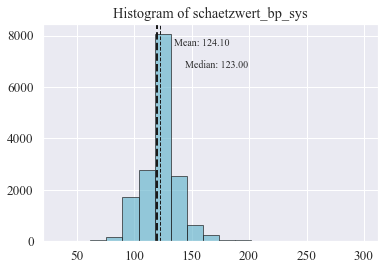

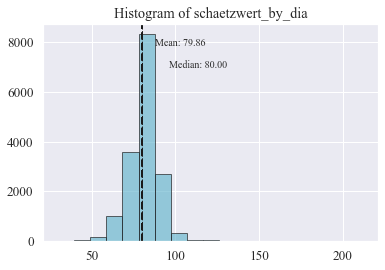

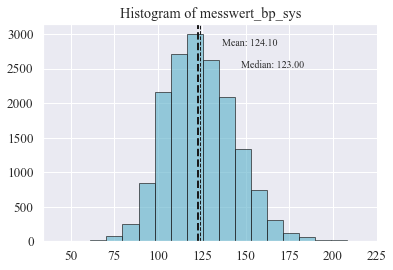

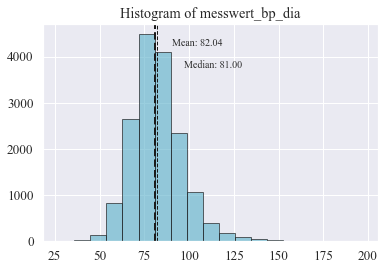

In [74]:
# Histogram Plot of the schaetzwert_bp_sys
min_value = data_df['schaetzwert_bp_sys'].min()
max_value = data_df['schaetzwert_bp_sys'].max()
bins = np.linspace(min_value,max_value,20)

result = plt.hist(data_df['schaetzwert_bp_sys'], bins = bins, color='c', edgecolor='k', alpha=0.65)
plt.axvline(data_df['schaetzwert_bp_sys'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(data_df['schaetzwert_bp_sys'].median(), color='k', linestyle='dashed', linewidth=2)

min_ylim, max_ylim = plt.ylim()
plt.text(data_df['schaetzwert_bp_sys'].mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(data_df['messwert_bp_sys'].mean()))
plt.text(data_df['schaetzwert_bp_sys'].median()*1.2, max_ylim*0.8, 'Median: {:.2f}'.format(data_df['messwert_bp_sys'].median()))
plt.title("Histogram of schaetzwert_bp_sys")
plt.savefig(os.path.join(PLOT_DIR_NAME, "schaetzwert_bp_sys_Hist.pdf"), dpi=180, bbox_inches='tight')
plt.show()

# Histogram Plot of the schaetzwert_by_dia
min_value = data_df['schaetzwert_by_dia'].min()
max_value = data_df['schaetzwert_by_dia'].max()
bins = np.linspace(min_value,max_value,20)

result = plt.hist(data_df['schaetzwert_by_dia'], bins = bins, color='c', edgecolor='k', alpha=0.65)
plt.axvline(data_df['schaetzwert_by_dia'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(data_df['schaetzwert_by_dia'].median(), color='k', linestyle='dashed', linewidth=2)

min_ylim, max_ylim = plt.ylim()
plt.text(data_df['schaetzwert_by_dia'].mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(data_df['schaetzwert_by_dia'].mean()))
plt.text(data_df['schaetzwert_by_dia'].median()*1.2, max_ylim*0.8, 'Median: {:.2f}'.format(data_df['schaetzwert_by_dia'].median()))
plt.title("Histogram of schaetzwert_by_dia")
plt.savefig(os.path.join(PLOT_DIR_NAME, "schaetzwert_by_dia_Hist.pdf"), dpi=180, bbox_inches='tight')
plt.show()

# Histogram Plot of the messwert_bp_sys
min_value = data_df['messwert_bp_sys'].min()
max_value = data_df['messwert_bp_sys'].max()
bins = np.linspace(min_value,max_value,20)

result = plt.hist(data_df['messwert_bp_sys'], bins = bins, color='c', edgecolor='k', alpha=0.65)
plt.axvline(data_df['messwert_bp_sys'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(data_df['messwert_bp_sys'].median(), color='k', linestyle='dashed', linewidth=2)

min_ylim, max_ylim = plt.ylim()
plt.text(data_df['messwert_bp_sys'].mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(data_df['messwert_bp_sys'].mean()))
plt.text(data_df['messwert_bp_sys'].median()*1.2, max_ylim*0.8, 'Median: {:.2f}'.format(data_df['messwert_bp_sys'].median()))
plt.title("Histogram of messwert_bp_sys")
plt.savefig(os.path.join(PLOT_DIR_NAME, "messwert_bp_sys_Hist.pdf"), dpi=180, bbox_inches='tight')
plt.show()

# Histogram Plot of the messwert_bp_dia
min_value = data_df['messwert_bp_dia'].min()
max_value = data_df['messwert_bp_dia'].max()
bins = np.linspace(min_value,max_value,20)

result = plt.hist(data_df['messwert_bp_dia'], bins = bins, color='c', edgecolor='k', alpha=0.65)
plt.axvline(data_df['messwert_bp_dia'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(data_df['messwert_bp_dia'].median(), color='k', linestyle='dashed', linewidth=2)

min_ylim, max_ylim = plt.ylim()
plt.text(data_df['messwert_bp_dia'].mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(data_df['messwert_bp_dia'].mean()))
plt.text(data_df['messwert_bp_dia'].median()*1.2, max_ylim*0.8, 'Median: {:.2f}'.format(data_df['messwert_bp_dia'].median()))
plt.title("Histogram of messwert_bp_dia")
plt.savefig(os.path.join(PLOT_DIR_NAME, "messwert_bp_dia_Hist.pdf"), dpi=180, bbox_inches='tight')
plt.show()

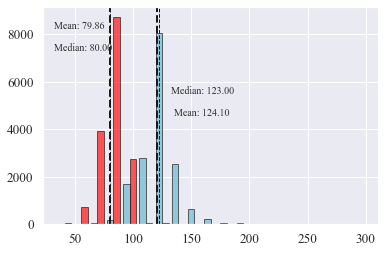

In [75]:
# Histogram Plot of the schaetzwert_bp_sys vs schaetzwert_by_dia Alternatively
min_value = data_df['schaetzwert_bp_sys'].min()
max_value = data_df['schaetzwert_bp_sys'].max()
bins = np.linspace(min_value,max_value,20)

result = plt.hist([data_df['schaetzwert_bp_sys'],data_df['schaetzwert_by_dia']], bins = bins, color=['c','red'], edgecolor='k', alpha=0.65)
plt.axvline(data_df['schaetzwert_bp_sys'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(data_df['schaetzwert_bp_sys'].median(), color='k', linestyle='dashed', linewidth=2)

min_ylim, max_ylim = plt.ylim()
plt.text(data_df['schaetzwert_bp_sys'].mean()*1.1, max_ylim*0.5, 'Mean: {:.2f}'.format(data_df['messwert_bp_sys'].mean()))
plt.text(data_df['schaetzwert_bp_sys'].median()*1.1, max_ylim*0.6, 'Median: {:.2f}'.format(data_df['messwert_bp_sys'].median()))

plt.axvline(data_df['schaetzwert_by_dia'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(data_df['schaetzwert_by_dia'].median(), color='k', linestyle='dashed', linewidth=2)

min_ylim, max_ylim = plt.ylim()
plt.text(data_df['schaetzwert_by_dia'].mean()*0.4, max_ylim*0.9, 'Mean: {:.2f}'.format(data_df['schaetzwert_by_dia'].mean()))
plt.text(data_df['schaetzwert_by_dia'].median()*0.4, max_ylim*0.8, 'Median: {:.2f}'.format(data_df['schaetzwert_by_dia'].median()))
plt.savefig(os.path.join(PLOT_DIR_NAME, "Mix_Hist.pdf"), dpi=180, bbox_inches='tight')

plt.show()


Nominal and Ordinl

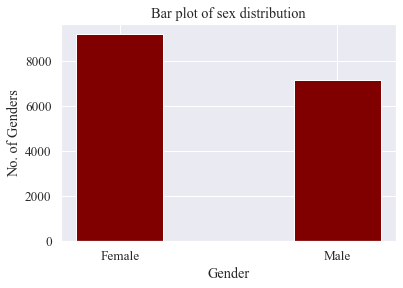

Steiermark          14373
Wien                  501
Niederösterreich      469
Oberösterreich        224
Kärnten               188
Burgenland            122
Salzburg               82
Tirol                  68
Vorarlberg             28
Name: bundesland, dtype: int64


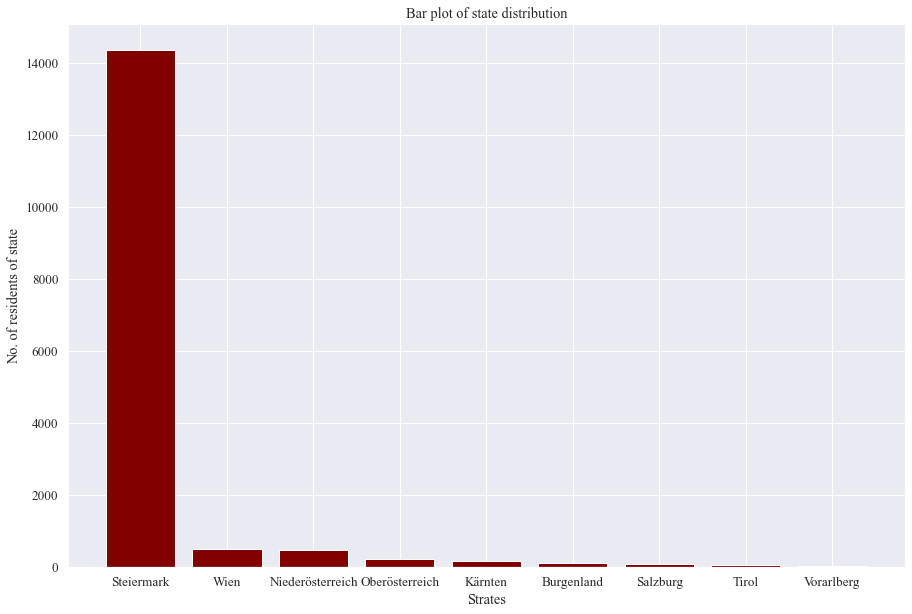

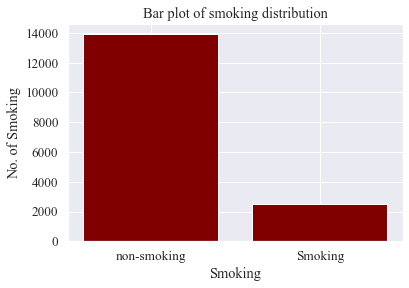

In [76]:

 
# creating the bar plot Genders
plt.bar(["Female", "Male"], data_df['geschlecht'].value_counts(), color ='maroon',
        width = 0.4)

plt.xlabel("Gender")
plt.ylabel("No. of Genders")
plt.title("Bar plot of sex distribution")
plt.savefig(os.path.join(PLOT_DIR_NAME, "sex_distribution_Bar.pdf"), dpi=180, bbox_inches='tight')
plt.show()

# creating the bar plot states
print(data_df['bundesland'].value_counts())

fig = plt.figure(figsize = (15, 10))
plt.bar(["Steiermark", "Wien", "Niederösterreich", "Oberösterreich", "Kärnten", "Burgenland", "Salzburg", "Tirol", "Vorarlberg"], data_df['bundesland'].value_counts(), color ='maroon')
 
plt.xlabel("Strates")
plt.ylabel("No. of residents of state")
plt.title("Bar plot of state distribution")
plt.savefig(os.path.join(PLOT_DIR_NAME, "state_distribution_Bar.pdf"), dpi=180, bbox_inches='tight')
plt.show()

# creating the bar plot smoking

plt.bar(["non-smoking", "Smoking"], data_df['raucher'].value_counts(), color ='maroon')
 
plt.xlabel("Smoking")
plt.ylabel("No. of Smoking")
plt.title("Bar plot of smoking distribution")
plt.savefig(os.path.join(PLOT_DIR_NAME, "smoking_distribution_Bar.pdf"), dpi=180, bbox_inches='tight')
plt.show()




Correlation

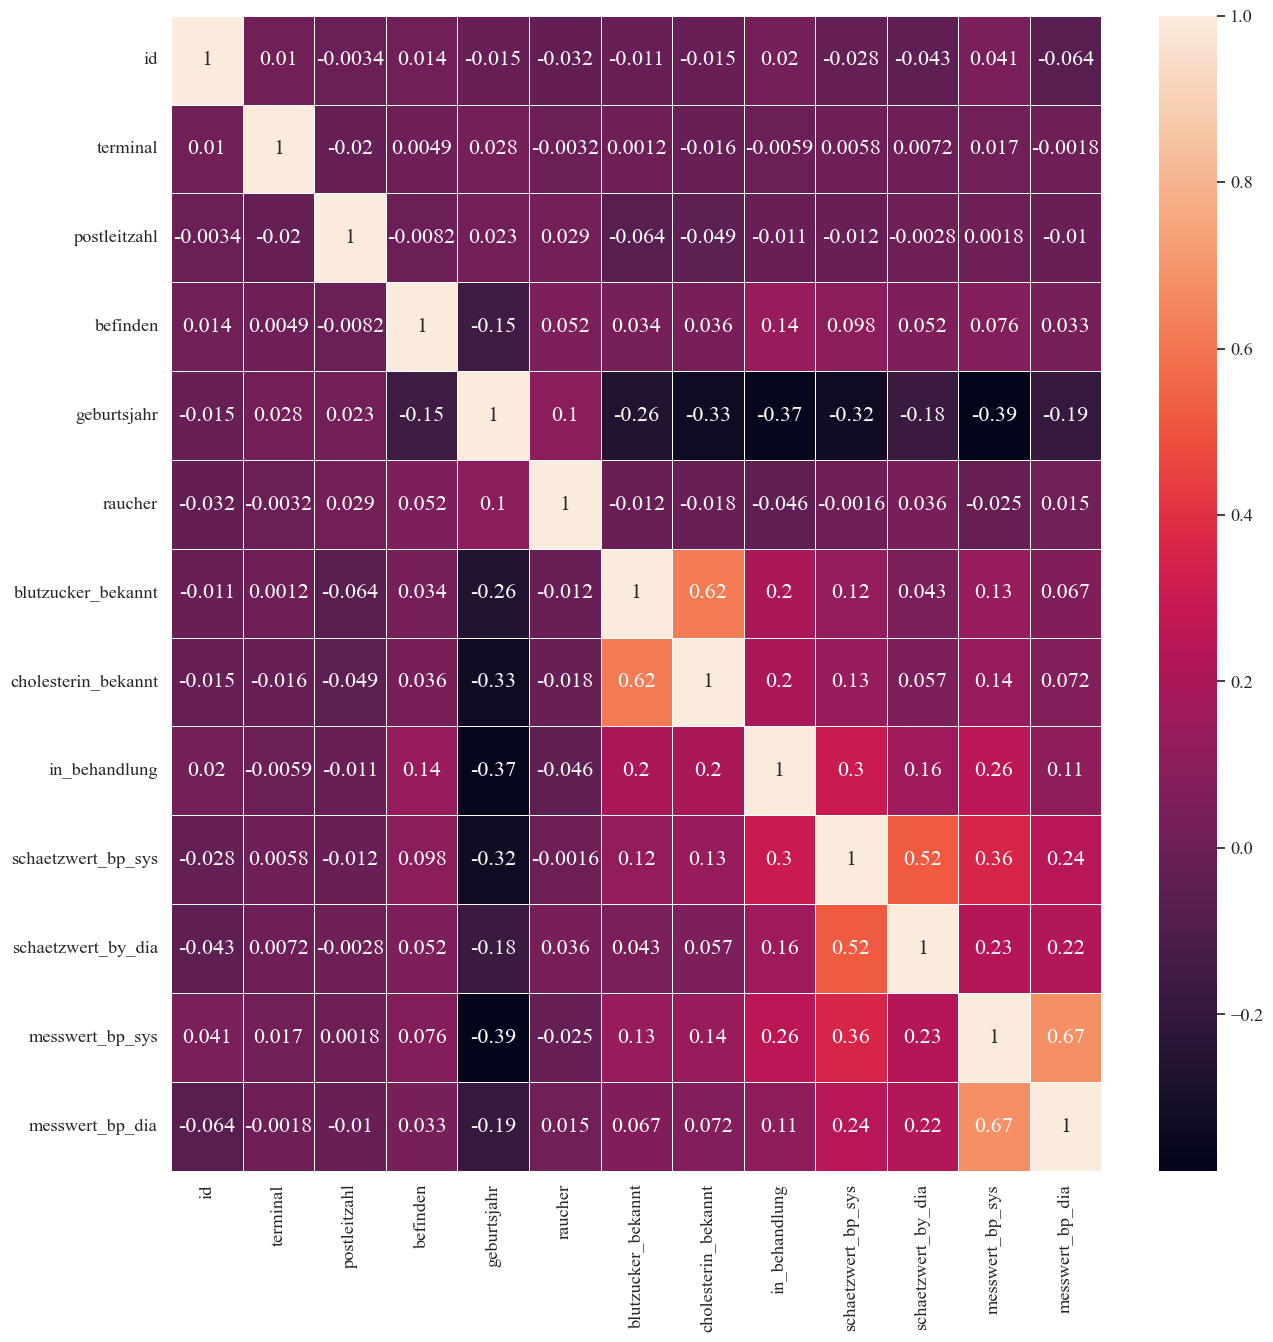

In [52]:
cols = ['id', 'terminal', 'postleitzahl', 'befinden', 'geburtsjahr', 'raucher',
       'blutzucker_bekannt', 'cholesterin_bekannt', 'in_behandlung',
       'schaetzwert_bp_sys', 'schaetzwert_by_dia', 'messwert_bp_sys',
       'messwert_bp_dia']
correlation_matrix = data_df[cols].corr()
fig, ax = plt.subplots(figsize=(15,15))     
plot = sns.heatmap(correlation_matrix, annot = True, linewidths=.5, ax=ax)
plt.show()
plot.figure.savefig(os.path.join(PLOT_DIR_NAME, "corr_matrix.pdf"), dpi=180, bbox_inches='tight')

Scatter Plots

Index(['schaetzwert_bp_sys', 'schaetzwert_by_dia', 'messwert_bp_sys',
       'messwert_bp_dia'],
      dtype='object')


c:\Users\Raafe\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\plotting\_matplotlib\core.py:1256: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  scatter = ax.scatter(
c:\Users\Raafe\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\plotting\_matplotlib\core.py:1256: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  scatter = ax.scatter(
c:\Users\Raafe\AppData\Local\Programs\Python\Python38\lib\site-p

<Figure size 640x480 with 0 Axes>

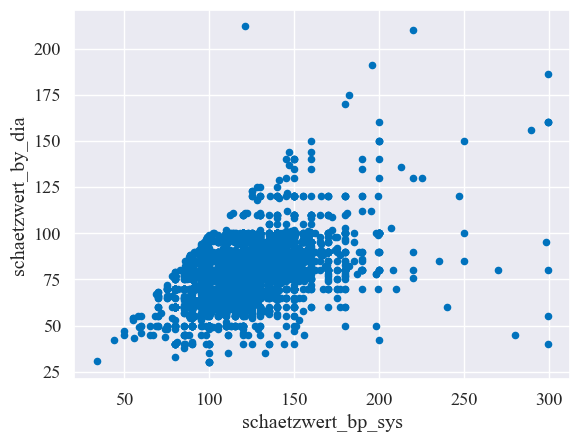

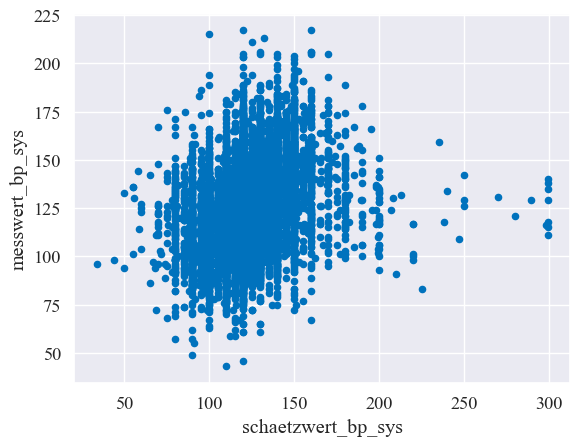

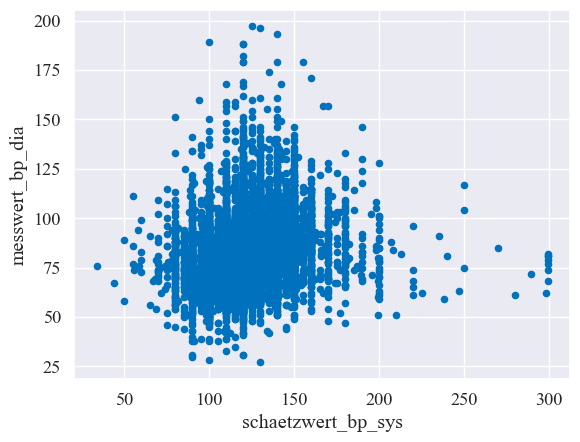

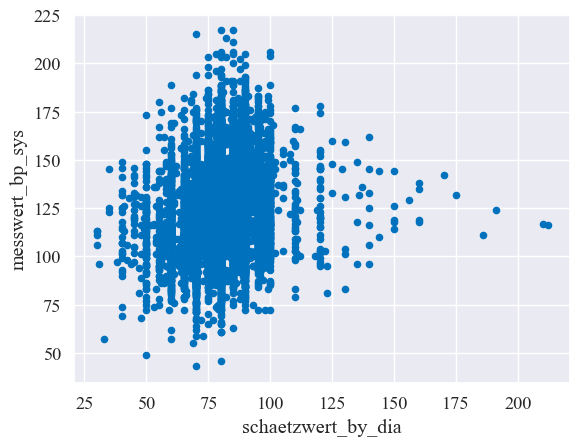

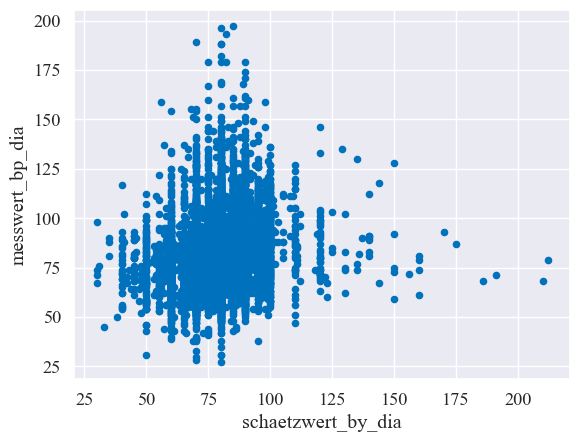

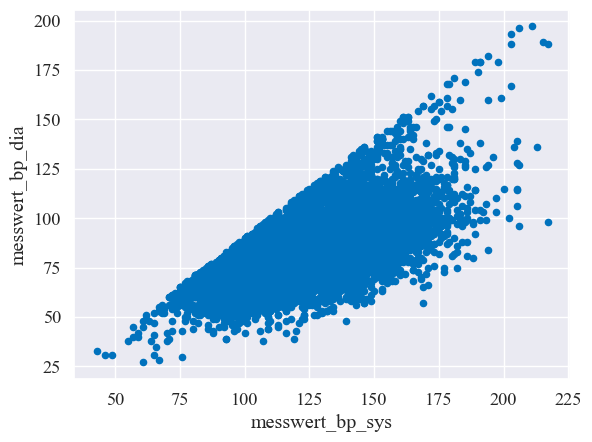

In [54]:
df_new = data_df.iloc[:, 14:18]
df_new.head()
print(df_new.columns)
col_list = list(df_new.columns)


plt.figure()
for i in range(len(col_list)):
    for j in range(i+1, len(col_list)):
        plot = df_new.plot.scatter(col_list[i], col_list[j], label=f'{col_list[i]} vs {col_list[j]}',color=PLOT_COLOR)
        plt.xlabel(col_list[i])
        plt.ylabel(col_list[j])
        plot.get_legend().remove()
        plot.figure.savefig(os.path.join(PLOT_DIR_NAME,col_list[i] +  "_vs_" + col_list[j] + ".pdf"), dpi=180, bbox_inches='tight')


plt.show()